In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기, metplotlib에 한글폰트 적용하기

In [8]:
plt.style.use('default')


# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)


# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/aiffel/ABC_RS3/entry_data.csv')
sales_data = pd.read_csv('/aiffel/aiffel/ABC_RS3/sales_data.csv')
item_data = pd.read_csv('/aiffel/aiffel/ABC_RS3/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/aiffel/ABC_RS3/item_entry_data.csv')


# 칼럼명 변경
entry_data = entry_data.rename(columns={'입실':'입실시간', '퇴실':'퇴실시간'})


# entry_data의 칼럼 : 요금제명,입실시간,퇴실시간,이용,위치,금액,구분,고객
# sales_data의 칼럼 : 결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
# item_data의 칼럼 : 구분,분류,상품명,판매금액
# item_entry_data의 칼럼 : 순위,분류,상품명,판매금액

#가장많이 팔리는 음식/음료:
#김치볶음밥, 라면, 짜장라면, 치즈불고기볶음밥, 계란추가, 낙지볶음밥 
#새우볶음밥, 새우볶음밥, 아메리카노(ICE), 치즈감자튀김, 감자튀김


### <월별 매출액추세 그래프>

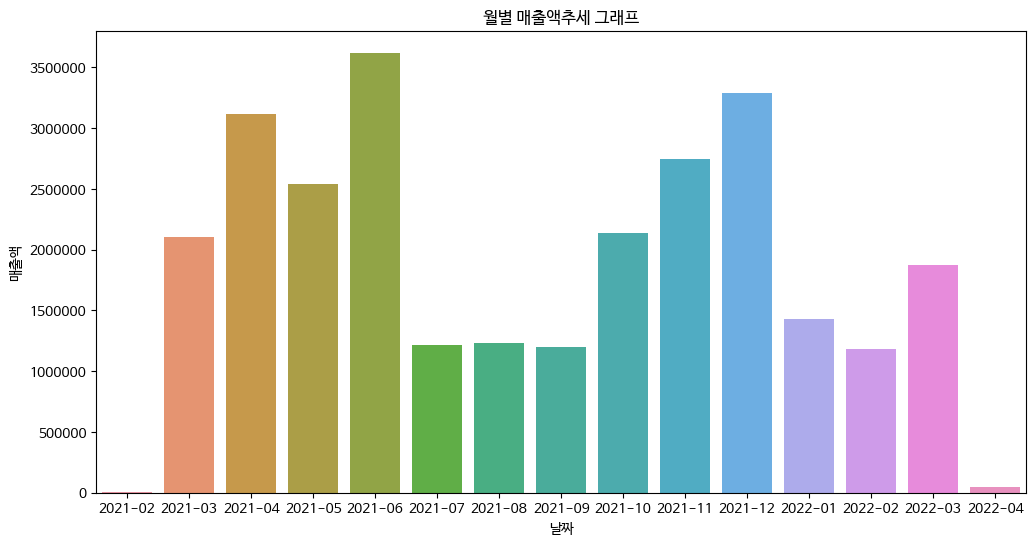

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN
7104,2021-02-17 13:27,카운터,카페라떼(HOT),신용카드,판매취소,-1,"-4,000",NaN


In [25]:
# sales_data에서 연도와 월 정보 추출하여 temp_var에 저장
temp_var = sales_data['결제일시'].apply(lambda x: str(x)[:7])

# temp_var의 '결제금액'칼럼 folat 화
temp_var = pd.concat([temp_var, sales_data['결제금액'].str.replace(',', '').astype(float)], axis=1)

# 연도와 월별 매출액 계산하기
sales_by_month = temp_var.groupby('결제일시')['결제금액'].sum()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.title('월별 매출액추세 그래프')

# Y축의 단위 표현을 숫자 그대로 표현하기
yticks = np.arange(0, sales_by_month.max(), 500000)
plt.yticks(yticks, yticks.astype(int))

plt.show()


### <음식,음료 TOP10>

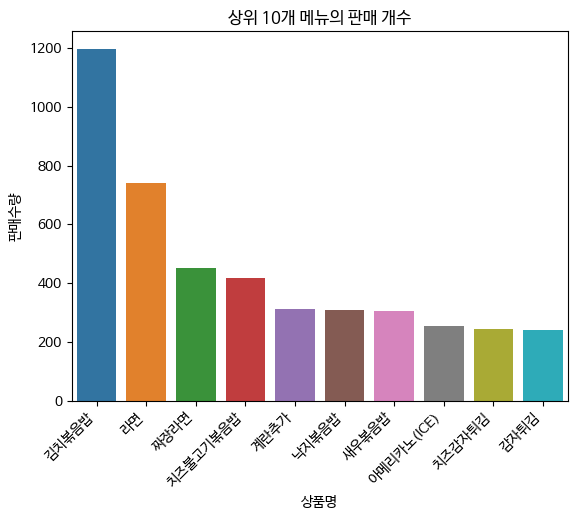

In [10]:
# 메뉴별 판매 개수 계산
menu_sales = sales_data.groupby('상품명')['판매수량'].sum().reset_index()

# 판매 개수가 많은 상위 10개 메뉴 추출
top_menu_sales = menu_sales.sort_values(by='판매수량', ascending=False).head(10)

# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

# 시각화
sns.barplot(x='상품명', y='판매수량', data=top_menu_sales)
plt.xticks(rotation=45, ha='right')
plt.title('상위 10개 메뉴의 판매 개수')
plt.show()

### <요금제별 매출액 TOP10>

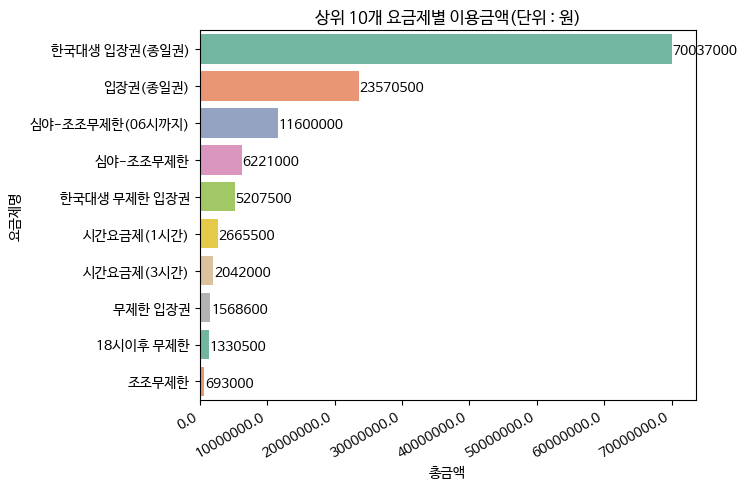

In [16]:
#요금제명을 기준으로 금액합산
temp_var = entry_data.groupby('요금제명')['금액'].sum().reset_index()
temp_var = temp_var.sort_values(by='금액', ascending=False).reset_index(drop=True)

#시각화
ax = sns.barplot(data=temp_var.head(10), x='금액', y='요금제명', palette='Set2')
plt.title('상위 10개 요금제별 이용금액(단위 : 원)')
plt.xlabel('총금액')
plt.ylabel('요금제명')
plt.xticks(rotation=30, ha='right')
plt.gca().xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))

for i, v in enumerate(temp_var.head(10)['금액']):
    ax.text(v + 100000, i + 0.15, "{:.0f}".format(v), color='black', fontsize=10)

plt.show()

In [ ]:
### 전체 매출대비 각 상품별 매출비율

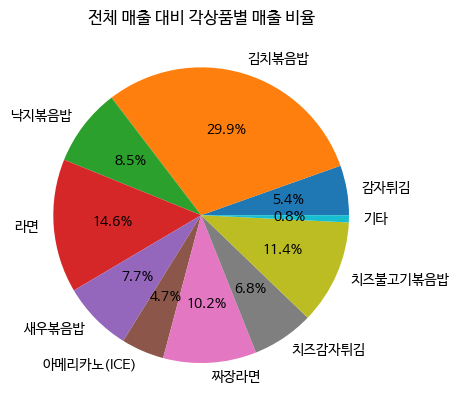

In [29]:
temp_var = sales_data['결제금액'].str.replace(',', '').astype(float)
total_sales = temp_var.sum()
selected_items = ['김치볶음밥', '라면', '짜장라면', '치즈불고기볶음밥', '계란추가', '낙지볶음밥',
                  '새우볶음밥', '아메리카노(ICE)', '치즈감자튀김', '감자튀김']

total_selected_sales = temp_var[sales_data['상품명'].isin(selected_items)].groupby(sales_data['상품명']).sum()

# 전체 매출에서 선택한 항목의 매출 비율 계산
sales_ratio = total_selected_sales / total_sales * 100

# 1% 이하인 항목들의 비율을 합쳐서 '기타' 항목으로 처리
other_ratio = sales_ratio[sales_ratio < 1].sum()
sales_ratio = sales_ratio[sales_ratio >= 1]
sales_ratio['기타'] = other_ratio

# 비율 시각화
plt.pie(sales_ratio, labels=sales_ratio.index, autopct='%.1f%%')
plt.title('전체 매출 대비 각상품별 매출 비율')
plt.show()